<a href="https://colab.research.google.com/github/juanpajedrez/pytorch_learning/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/02_pytorch_classification/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
import numpy as np
from torch import nn #nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check Pytorch version
torch.__version__

'2.5.1+cu121'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patters in the numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

print(X[:10], y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [ ]:
print(X.shape, y.shape)

torch.Size([50, 1]) torch.Size([50, 1])


### Splitting data into training and test sets (one of the most important concepts in machine learning in general).

Let's create a training and test set with our data.

In [ ]:
# Create a training/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize"

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  '''
  Plot training data, test data and compares predictions.
  '''
  plt.figure(figsize = (10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")

  #Are there predictions
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")

  #Show the legend
  plt.legend(prop = {"size":14})

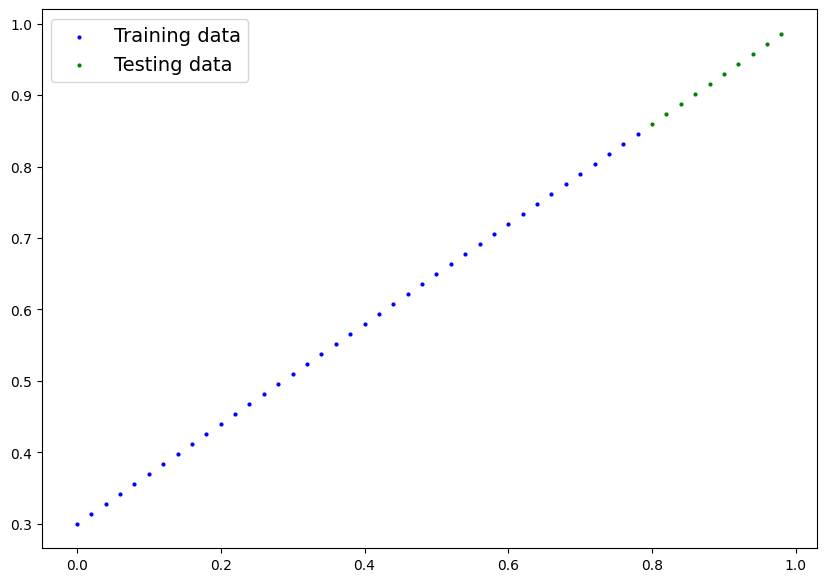

In [ ]:
plot_predictions()

## 2. Build model

Our first Pytorch Model.

Lets do it! we would be using python OOP, to do so, you can use the following resource from Real Python:
https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values (weight and bias).
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the wieght & bias values we used to create the data).

How does it do so?

Through two main algorithms:
1. Gradient Descent: https://www.youtube.com/watch?v=IHZwWFHWa-w&t=444s&ab_channel=3Blue1Brown
2. Backpropagation: https://www.youtube.com/watch?v=Ilg3gGewQ5U&ab_channel=3Blue1Brown

In [ ]:
from torch import nn

#Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits nn.Module
  def __init__(self) -> None:
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype= torch.float))

  #Forward method to define the computation of the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: #<- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula



### Pytorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a compuational graph).
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward().
*torch.optim - this is where the optimizers in PyTorch live, these will help with gradient descent.
* def forward() -All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

See more of these essentials via the PyTorch Module: https://pytorch.org/tutorials/beginner/ptcheat.html


### Checking the contents of our PyTorch Model

Now we've created a model, let's see what's inside.

So we can check out our model parameters or what's inside our model using `.parameters()`!

In [ ]:
# Create a random seed
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the parameters (its a generator, so list it!)
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List named parameters
print(model_0.state_dict())

#Print the necessary values now
print(f"Real Weights: {weight}, Real Bias: {bias}")

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
Real Weights: 0.7, Real Bias: 0.3


### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the 'forward()' method.

In [ ]:
# Lets see what X_test
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad, however torch.inference_mode() is preferred
# with torch.no_grad():
# y_preds = model_0(X_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

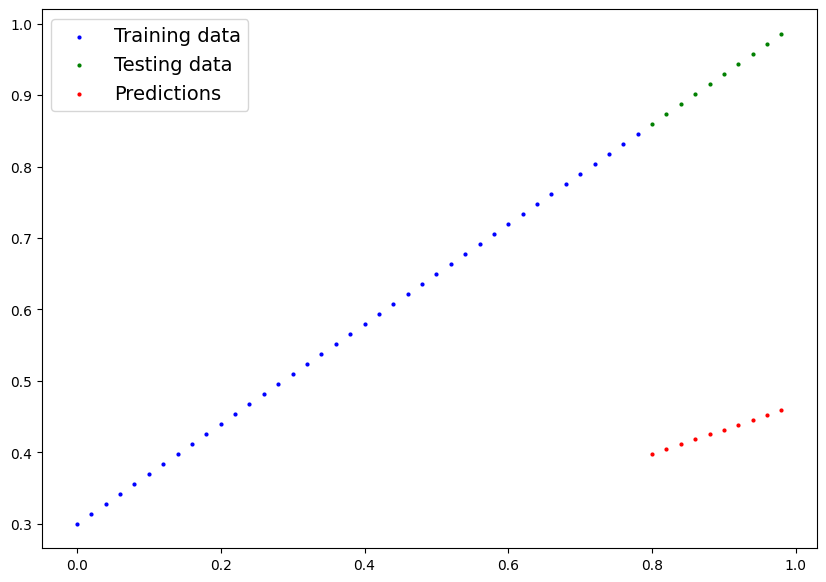

In [ ]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are us to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case we're going to refer to it as a loss function.

* **Loss function:** A function to measure how wrong your model's predictions are to the ideals outputs, lower is better.
* **Optimizer** Takes into account the loss of a model and adjusts the model's parameters (e.g: weight and biases).
Link: https://pytorch.org/docs/stable/optim.html


And specifically for PyTorch, wee need:
* A training loop.
* A testing loop.

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#Check our model's parameters (a parameter is a value that the model sets itself).
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (Stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) # lr = learning rate =  possibly the most important hyperparameter you can set

**Q**: Which loss function and optimizer should I use?

**A**: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't work with your particular problem set.

For example, for a regression problem (like ours, a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice).

But for a classification problem like classifying wheter a photo is of a dog or a cat, you'll likely want to use a binary classification loss `nn.BCELoss()` (binary cross entropy loss).


### Building a training loop in PyTorch (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()`) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels).
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (cost) (**Backpropagation**).
5. Optimizer step - Use the optimizer to adjust our model's parameters to try and improve the loss (**Gradient Descent**).

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

#Set up lists for tracking experiments
epoch_count = []
train_loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to update

  # 1. Forward pass on training data
  y_pred = model_0(X_train)

  # 2. Calculate the loss on training data
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer channges will accumulate through the loop so... we have to zero them before going into the loop again

  ### Testing
  model_0.eval() #turns off different settings in the model not needed for evaluation/testing (dropout/batchnorm_layers)
  with torch.inference_mode(): #turns off gradient tracking with a couple more optimization lines: https://x.com/PyTorch/status/1437838231505096708
  #with torch.no_grad() # you may also see this in old PyTorch CODE

    #1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happenin'
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss}| Test loss: {test_loss}")
    # Print out the model state dict
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534| Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637| Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134| Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906| Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802| Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876| Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351| Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

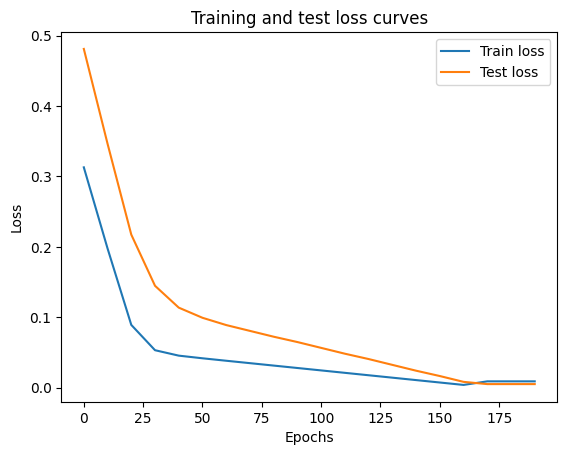

In [ ]:
#Convert the list to numpy
np_train_loss_values = np.array(torch.tensor(train_loss_values).cpu().numpy())
np_test_loss_values = np.array(torch.tensor(test_loss_values).cpu().numpy())

#Plot the loss curves
plt.plot(epoch_count, np_train_loss_values, label = "Train loss")
plt.plot(epoch_count, np_test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
#Obtain the predictions new with trained model
with torch.inference_mode():
  model_0.eval()
  y_preds_new = model_0(X_test)
  print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [ ]:
weight, bias

(0.7, 0.3)

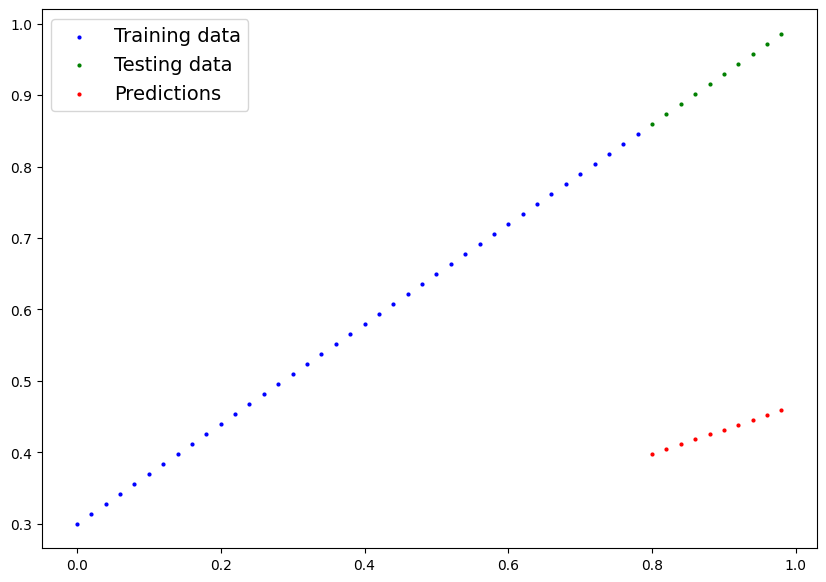

In [ ]:
#Plot the predcitions without training
plot_predictions(predictions=y_preds)

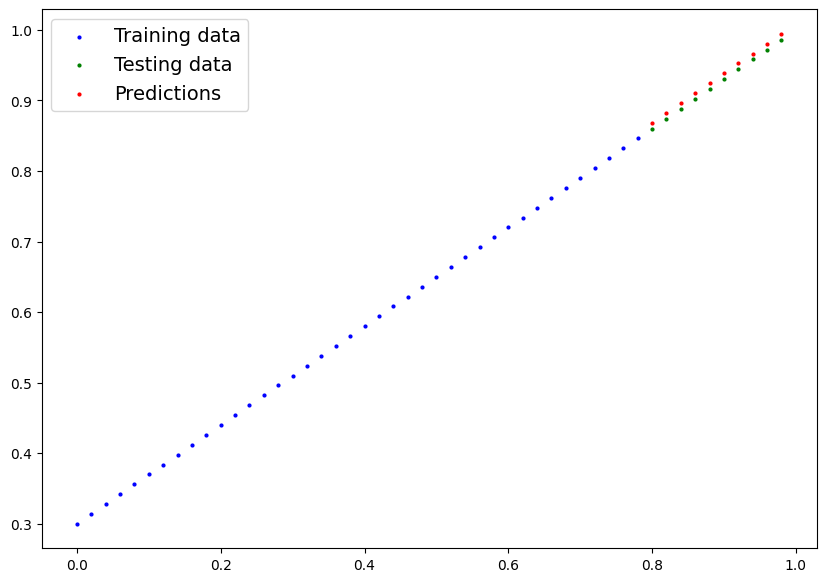

In [ ]:
#Plot the new predictions
plot_predictions(predictions = y_preds_new)

### Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()`: Saves you a PyTorch object in pickle format.
2. `torch.load()`: Allows you load a saved PyTorch Object.
3. `torch.nn.Module.load_state_dict()`: Allos you to load's a model's saved state dictionary.

PyTorch save & load code tutorial + extra curriculum: https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
### Saving our PyTorch model
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

#2. Create model save path (extension .pth for PyTorch Objects)
MODEL_NAME = "01_PyTorch_Workflow_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model_state_dict for inference (Recommended)
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to:models/01_PyTorch_Workflow_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1580 Jan 23 23:48 01_PyTorch_Workflow_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()`, we'll create a new instance of our
model class and load the saved `state_dict()` into that.

In [ ]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dcit of model_0 (this will update the new instance with updated parameters).
# ALWAYS use weights_only = True to protect your system :)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6 Putting it all together

Let's go back through the steps above and see it all in one place.


In [ ]:
# Importing PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.5.1+cu121'

### Create device Agnostic code
This meas if we've got access to GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [ ]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
if device == "cuda":
  !nvidia-smi

Thu Jan 23 23:48:58 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0              33W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight*features + bias
weight = 0.4
bias = 0.2

# Create range of values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2080],
         [0.2160],
         [0.2240],
         [0.2320],
         [0.2400],
         [0.2480],
         [0.2560],
         [0.2640],
         [0.2720]]))

In [ ]:
#Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  '''
  Plot training data, test data and compares predictions.
  '''
  plt.figure(figsize = (10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")

  #Are there predictions
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")

  #Show the legend
  plt.legend(prop = {"size":14})

torch.Size([50, 1])
torch.Size([50, 1])


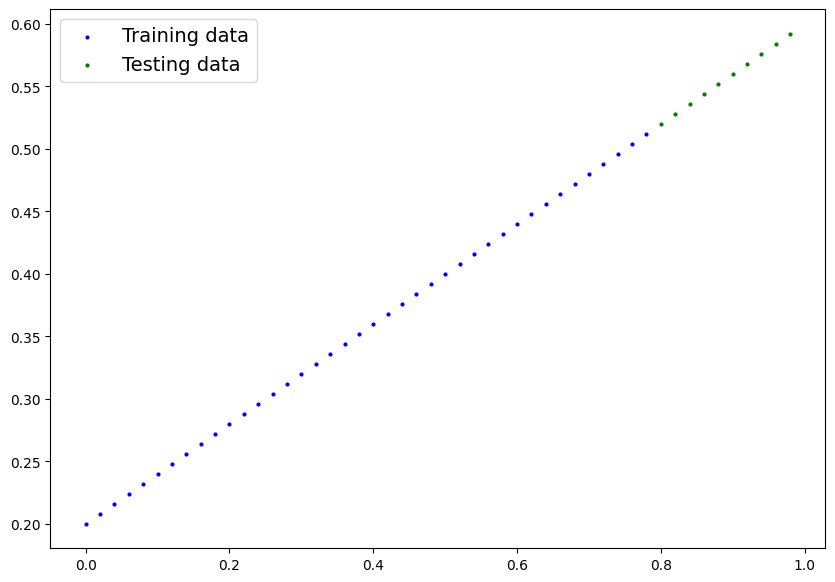

In [ ]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions()
print(X.shape)
print(y.shape)

## 6.2 Building a PyTorch Linear Model

In [ ]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.size())
print(m)

torch.Size([128, 30])
Linear(in_features=20, out_features=30, bias=True)


In [ ]:
# lets create a class for a New Linear Model
class LinearRegressionModelV2(nn.Module):
  def __init__(self) -> None:
    super().__init__() # Initialize the super class for all torch.nn functionalities

    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # Perform the forward pass of it
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

## 6.3 Training

For training we need:
* Loss function.
* Optimizer.
* Training loop.
* Testing loop.

In [ ]:
# Setup loss function using L1 loss
loss_fn = nn.L1Loss() # Same as MAE

#Setup our optimizer with stochaastic gradient descent
optimizer = torch.optim.SGD(params = model_1.parameters(), \
                            lr = 0.01)

In [ ]:
#Lets write a training loop
torch.manual_seed(42)
epochs = 200

#Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  #2. Calucalte the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation
  loss.backward()

  #5. Perform Optimizer step, step, step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  #Print out whats happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch}| Train loss: {loss}| Test loss {test_loss}")

Epoch: 0| Train loss: 0.7721779942512512| Test loss 0.9409762620925903
Epoch: 10| Train loss: 0.6569680571556091| Test loss 0.8062664270401001
Epoch: 20| Train loss: 0.5417582392692566| Test loss 0.6715565919876099
Epoch: 30| Train loss: 0.4265483021736145| Test loss 0.5368467569351196
Epoch: 40| Train loss: 0.3113384246826172| Test loss 0.402136892080307
Epoch: 50| Train loss: 0.19612857699394226| Test loss 0.2674270570278168
Epoch: 60| Train loss: 0.08091866970062256| Test loss 0.13271720707416534
Epoch: 70| Train loss: 0.01928839646279812| Test loss 0.047784872353076935
Epoch: 80| Train loss: 0.015457023866474628| Test loss 0.03542662784457207
Epoch: 90| Train loss: 0.01201879233121872| Test loss 0.027154160663485527
Epoch: 100| Train loss: 0.008583522401750088| Test loss 0.019568556919693947
Epoch: 110| Train loss: 0.005153974052518606| Test loss 0.01129607018083334
Epoch: 120| Train loss: 0.0021402728743851185| Test loss 0.008357048034667969
Epoch: 130| Train loss: 0.0075733619742

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4049]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1905], device='cuda:0'))])

In [ ]:
weight, bias

(0.4, 0.2)

## 6.4 Making and Evaluating predictions

In [ ]:
# Turn model into evaluation model
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
print(y_preds)
print(y_test)

tensor([[0.5144],
        [0.5225],
        [0.5306],
        [0.5387],
        [0.5468],
        [0.5549],
        [0.5630],
        [0.5711],
        [0.5792],
        [0.5873]], device='cuda:0')
tensor([[0.5200],
        [0.5280],
        [0.5360],
        [0.5440],
        [0.5520],
        [0.5600],
        [0.5680],
        [0.5760],
        [0.5840],
        [0.5920]], device='cuda:0')


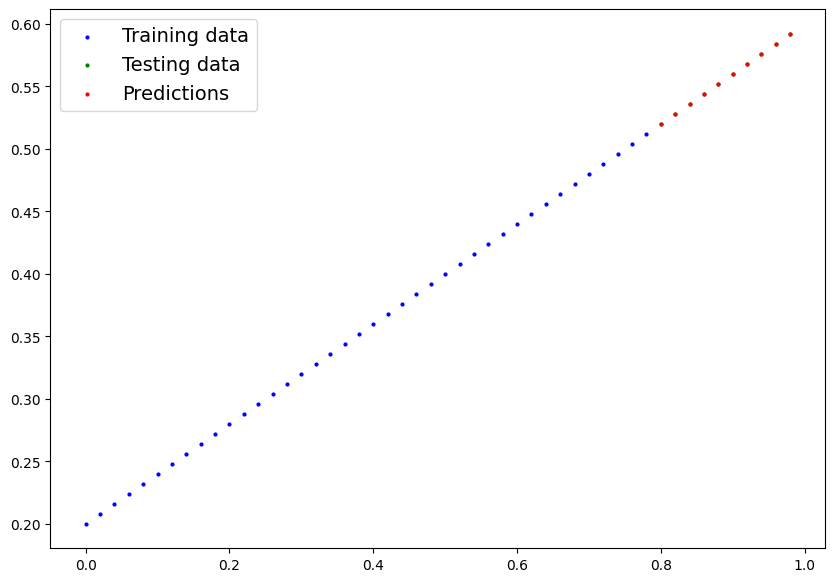

In [ ]:
#Check out our model predictions visually
plot_predictions(predictions = y_test.cpu())

## 6.5 Saving & loading a trained model

In [ ]:
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#3. Save the model saate dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
          f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1_state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

#Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4049]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1905], device='cuda:0'))])

In [ ]:
#Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Excercises and Extra curriculum:

For excercise & extra-curriculum, refer to:
https://www.learnpytorch.io/01_pytorch_workflow/#extra-curriculum

